In [24]:
import xarray as xr
import datetime
import pymannkendall as mk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import theilslopes
from dask.diagnostics import ProgressBar
import pymannkendall as mk

import pandas as pd
import datetime

In [2]:
# load landcover and anette's landcover! (first normal landcover)
land_cover = xr.open_dataset('/mnt/data7/nfs4/avh_ndvi/sdupuis/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc', engine='netcdf4')

In [3]:
land_cover

<xarray.Dataset>
Dimensions:              (lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    lccs_class           (lat, lon) float32 ...
    processed_flag       (lat, lon) float32 ...
    current_pixel_state  (lat, lon) float32 ...
    observation_count    (lat, lon) float32 ...
    change_count         (lat, lon) float32 ...
    crs                  int32 ...
Attributes: (12/38)
    title:                      ESA CCI Land Cover Map
    summary:                    This dataset contains the global ESA CCI land...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    ...                         ...
    geospatial_lon_max:         180.0
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

In [4]:
lc = land_cover.sel(lat=slice(72,55), lon=slice(-168,-150))

In [5]:
lst_2001 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2001/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [6]:
lst_2002 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2002/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [7]:
lst_2003 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2003/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [8]:
lst_2004 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2004/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [9]:
lst_2005 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2005/AVN16/LST_AVN16_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [10]:
lst_2006 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2006/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [11]:
lst_2007 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2007/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [12]:
lst_2008 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2008/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [13]:
lst_2009 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2009/AVN18/LST_AVN18_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [14]:
lst_2010 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2010/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [15]:
lst_2011 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2011/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [16]:
lst_2012 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2012/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [17]:
lst_2013 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2013/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [18]:
lst_2014 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2014/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [19]:
lst_2015 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2015/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [20]:
lst_2016 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2016/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [21]:
lst_2017 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2017/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [22]:
lst_2018 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2018/AVN19/LST_AVN19_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [23]:
lc_interp = lc.interp(lat=lst_2018.coords['lat'], lon=lst_2018.coords['lon'], method='nearest')

In [27]:
def semimonth_time(time):
    year = time.dt.year
    month = time.dt.month

    day = xr.where(time.dt.day <= 15, 1, 16)

    return xr.apply_ufunc(
        pd.to_datetime,
        year * 10000 + month * 100 + day,
        vectorize=True,
        output_dtypes=["datetime64[ns]"],
    )

In [28]:
results = []

for year in range(2001, 2018):

    ds = globals()[f"lst_{year}"]

    # --------------------------------------------------
    # 2. Mask unwanted landcover
    # --------------------------------------------------
    ds = ds.where(lc_interp['lccs_class'] != 210)

    # --------------------------------------------------
    # 3. Remove clouds (flag = 110)
    # --------------------------------------------------
    clean_LST = ds['LST'].where(ds['LST'] != 110)

    # --------------------------------------------------
    # 4. Create semi-monthly bins
    # --------------------------------------------------
    clean_LST = clean_LST.assign_coords(
        semimonth_time=semimonth_time(clean_LST.time)
    )

    # --------------------------------------------------
    # 5. Aggregate (MAX per semi-month)
    # --------------------------------------------------
    semi_month_max = (
        clean_LST
        .groupby("semimonth_time")
        .max()
        .rename({"semimonth_time": "time"})
    )

    results.append(semi_month_max)


/tmp/ipykernel_18317/1588082780.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18317/1588082780.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

In [29]:
lst_semimonth = xr.concat(results, dim="time").sortby("time")

In [30]:
lst_semimonth

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 34)>
dask.array<concatenate, shape=(800, 7200, 34), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 1970-01-01T00:00:00.020010 ... 1970-01...

In [ ]:
# load the time series somewhere ?
results = {}

for year in range(1981, 2008):

    ds = globals()[f"lst_{year}"]   # load lst_1981, lst_1982, ...

    # 1. Remove Feb 29 so leap years don't shift bins -> rather compute max of 29 and 28
    ds = ds.where(~((ds.time.dt.month == 2) & (ds.time.dt.day == 29)), drop=True)
    print(ds)

    # 2. Fixed 10-day bins anchored at Jan 1 every year
    
    ds = ds.where(lc_interp['lccs_class'] != 210)
    print(ds)
    clean_LST = ds['LST'].where(ds['LST'] != 110, np.nan)
    max_10d = (
        clean_LST
        .resample(
            time='10D',
            origin=datetime.datetime(year, 1, 1)   # FIXED bin alignment
        )
        .max()
    )

    # Ensure bins exist even with no data
    # Xarray automatically creates them and fills with NaN

    results[year] = max_10d

<xarray.Dataset>
Dimensions:      (lat: 800, lon: 7200, time: 152)
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 1981-08-02 1981-08-03 ... 1981-12-31
Data variables:
    LST          (lat, lon, time) float32 dask.array<chunksize=(800, 7200, 1), meta=np.ndarray>
    satzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    sunzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    scan_time    (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    test_mae     (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    r2           (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
<xarray.Dataset>
Dimensions:      (lat: 800,

In [338]:
combined = xr.concat([results[y] for y in range(1981, 2008)], dim="time")

In [340]:
combined

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 969)>
dask.array<concatenate, shape=(800, 7200, 969), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 1981-07-30 1981-08-09 ... 2007-12-27

In [341]:
results[1985]

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 37)>
dask.array<transpose, shape=(800, 7200, 37), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 1985-01-01 1985-01-11 ... 1985-12-27

In [342]:
import numpy as np

# compute bin index: 1, 2, 3, ..., 36
bin_index = ((combined.time.dt.dayofyear - 1) // 10) + 1

# keep only the number of bins you actually have (usually 36)
combined = combined.assign_coords(bin=bin_index)

In [343]:
combined

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 969)>
dask.array<concatenate, shape=(800, 7200, 969), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 1981-07-30 1981-08-09 ... 2007-12-27
    bin          (time) int64 22 23 24 25 26 27 28 29 ... 31 32 33 34 35 36 37

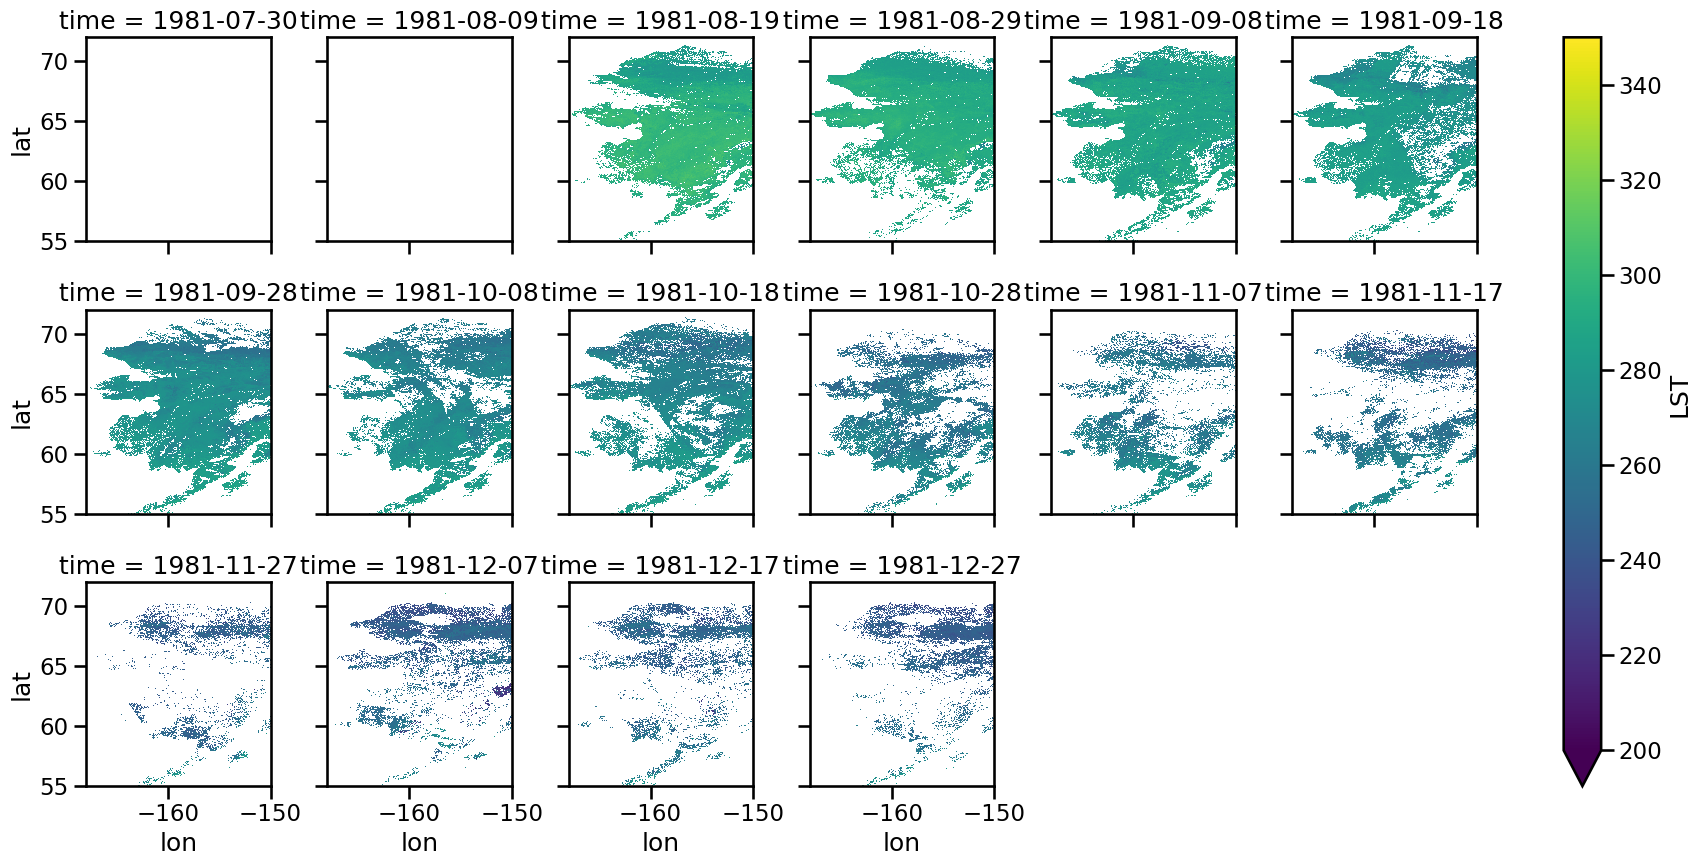

In [344]:
combined.sel(lat=slice(55,72), lon=slice(-168,-150), time=slice('1981-07','1981-12')).plot(x="lon", y="lat", col="time", col_wrap=6, vmax=350, vmin=200);

In [345]:
climatology = combined.groupby("bin").mean("time")

In [346]:
combined.groupby("bin")

DataArrayGroupBy, grouped over 'bin'
37 groups with labels 1, 2, 3, 4, 5, 6, ..., 33, 34, 35, 36, 37.

In [347]:
climatology

<xarray.DataArray 'LST' (lat: 800, lon: 7200, bin: 37)>
dask.array<transpose, shape=(800, 7200, 37), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * bin          (bin) int64 1 2 3 4 5 6 7 8 9 10 ... 29 30 31 32 33 34 35 36 37

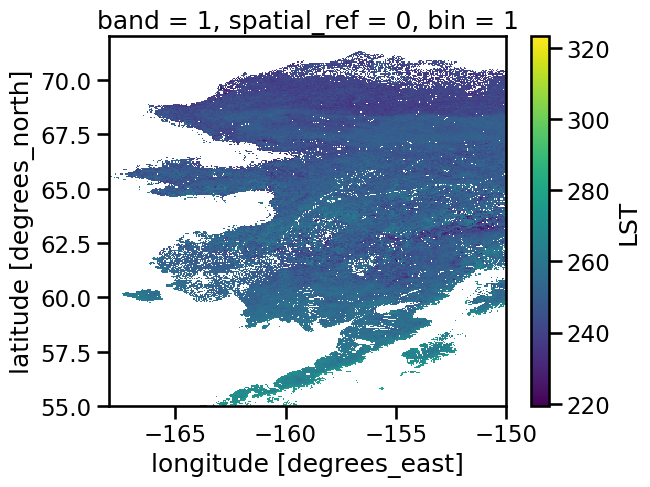

In [348]:
climatology.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(bin=0).plot();

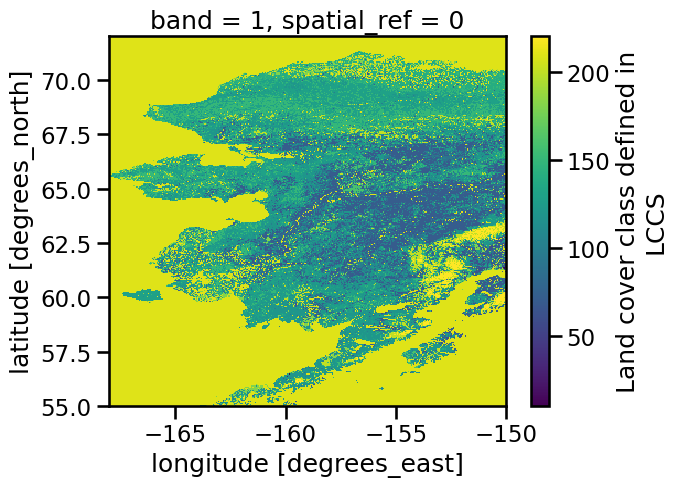

In [271]:
lc_interp['lccs_class'].sel(lat=slice(55,72), lon=slice(-168,-150)).plot();

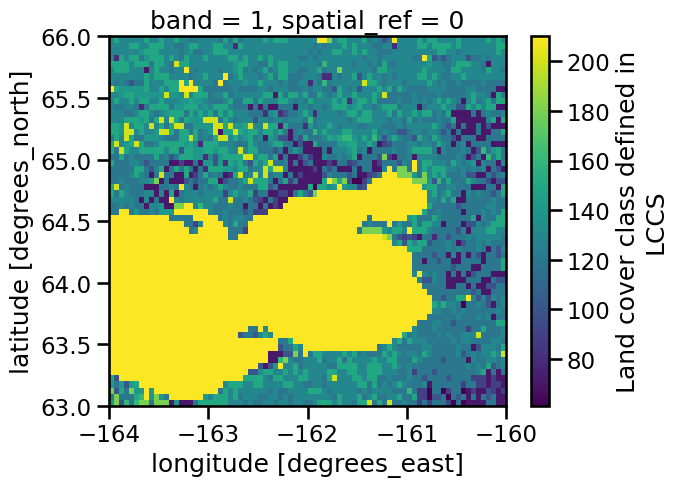

In [272]:
import matplotlib.pyplot as plt
lc_interp['lccs_class'].sel(lat=slice(63,66), lon=slice(-164,-160)).plot();
plt.savefig('landcover_precise.png')

In [273]:
lc_interp['lccs_class'].sel(lat=64.9, lon=-162, method='nearest')

<xarray.DataArray 'lccs_class' ()>
array(71., dtype=float32)
Coordinates:
    lat          float32 64.93
    lon          float32 -162.0
    band         int64 1
    spatial_ref  int64 0
Attributes:
    long_name:            Land cover class defined in LCCS
    standard_name:        land_cover_lccs
    flag_values:          [   0   10   11   12   20   30   40   50   60   61 ...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...

In [274]:
lc_interp['lccs_class']

<xarray.DataArray 'lccs_class' (lat: 800, lon: 7200)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
Attributes:
    long_name:            Land cover class defined in LCCS
    standard_name:        land_cover_lccs
    flag_values:          [   0   10   11   12   20   30   40   50   60   61 ...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...

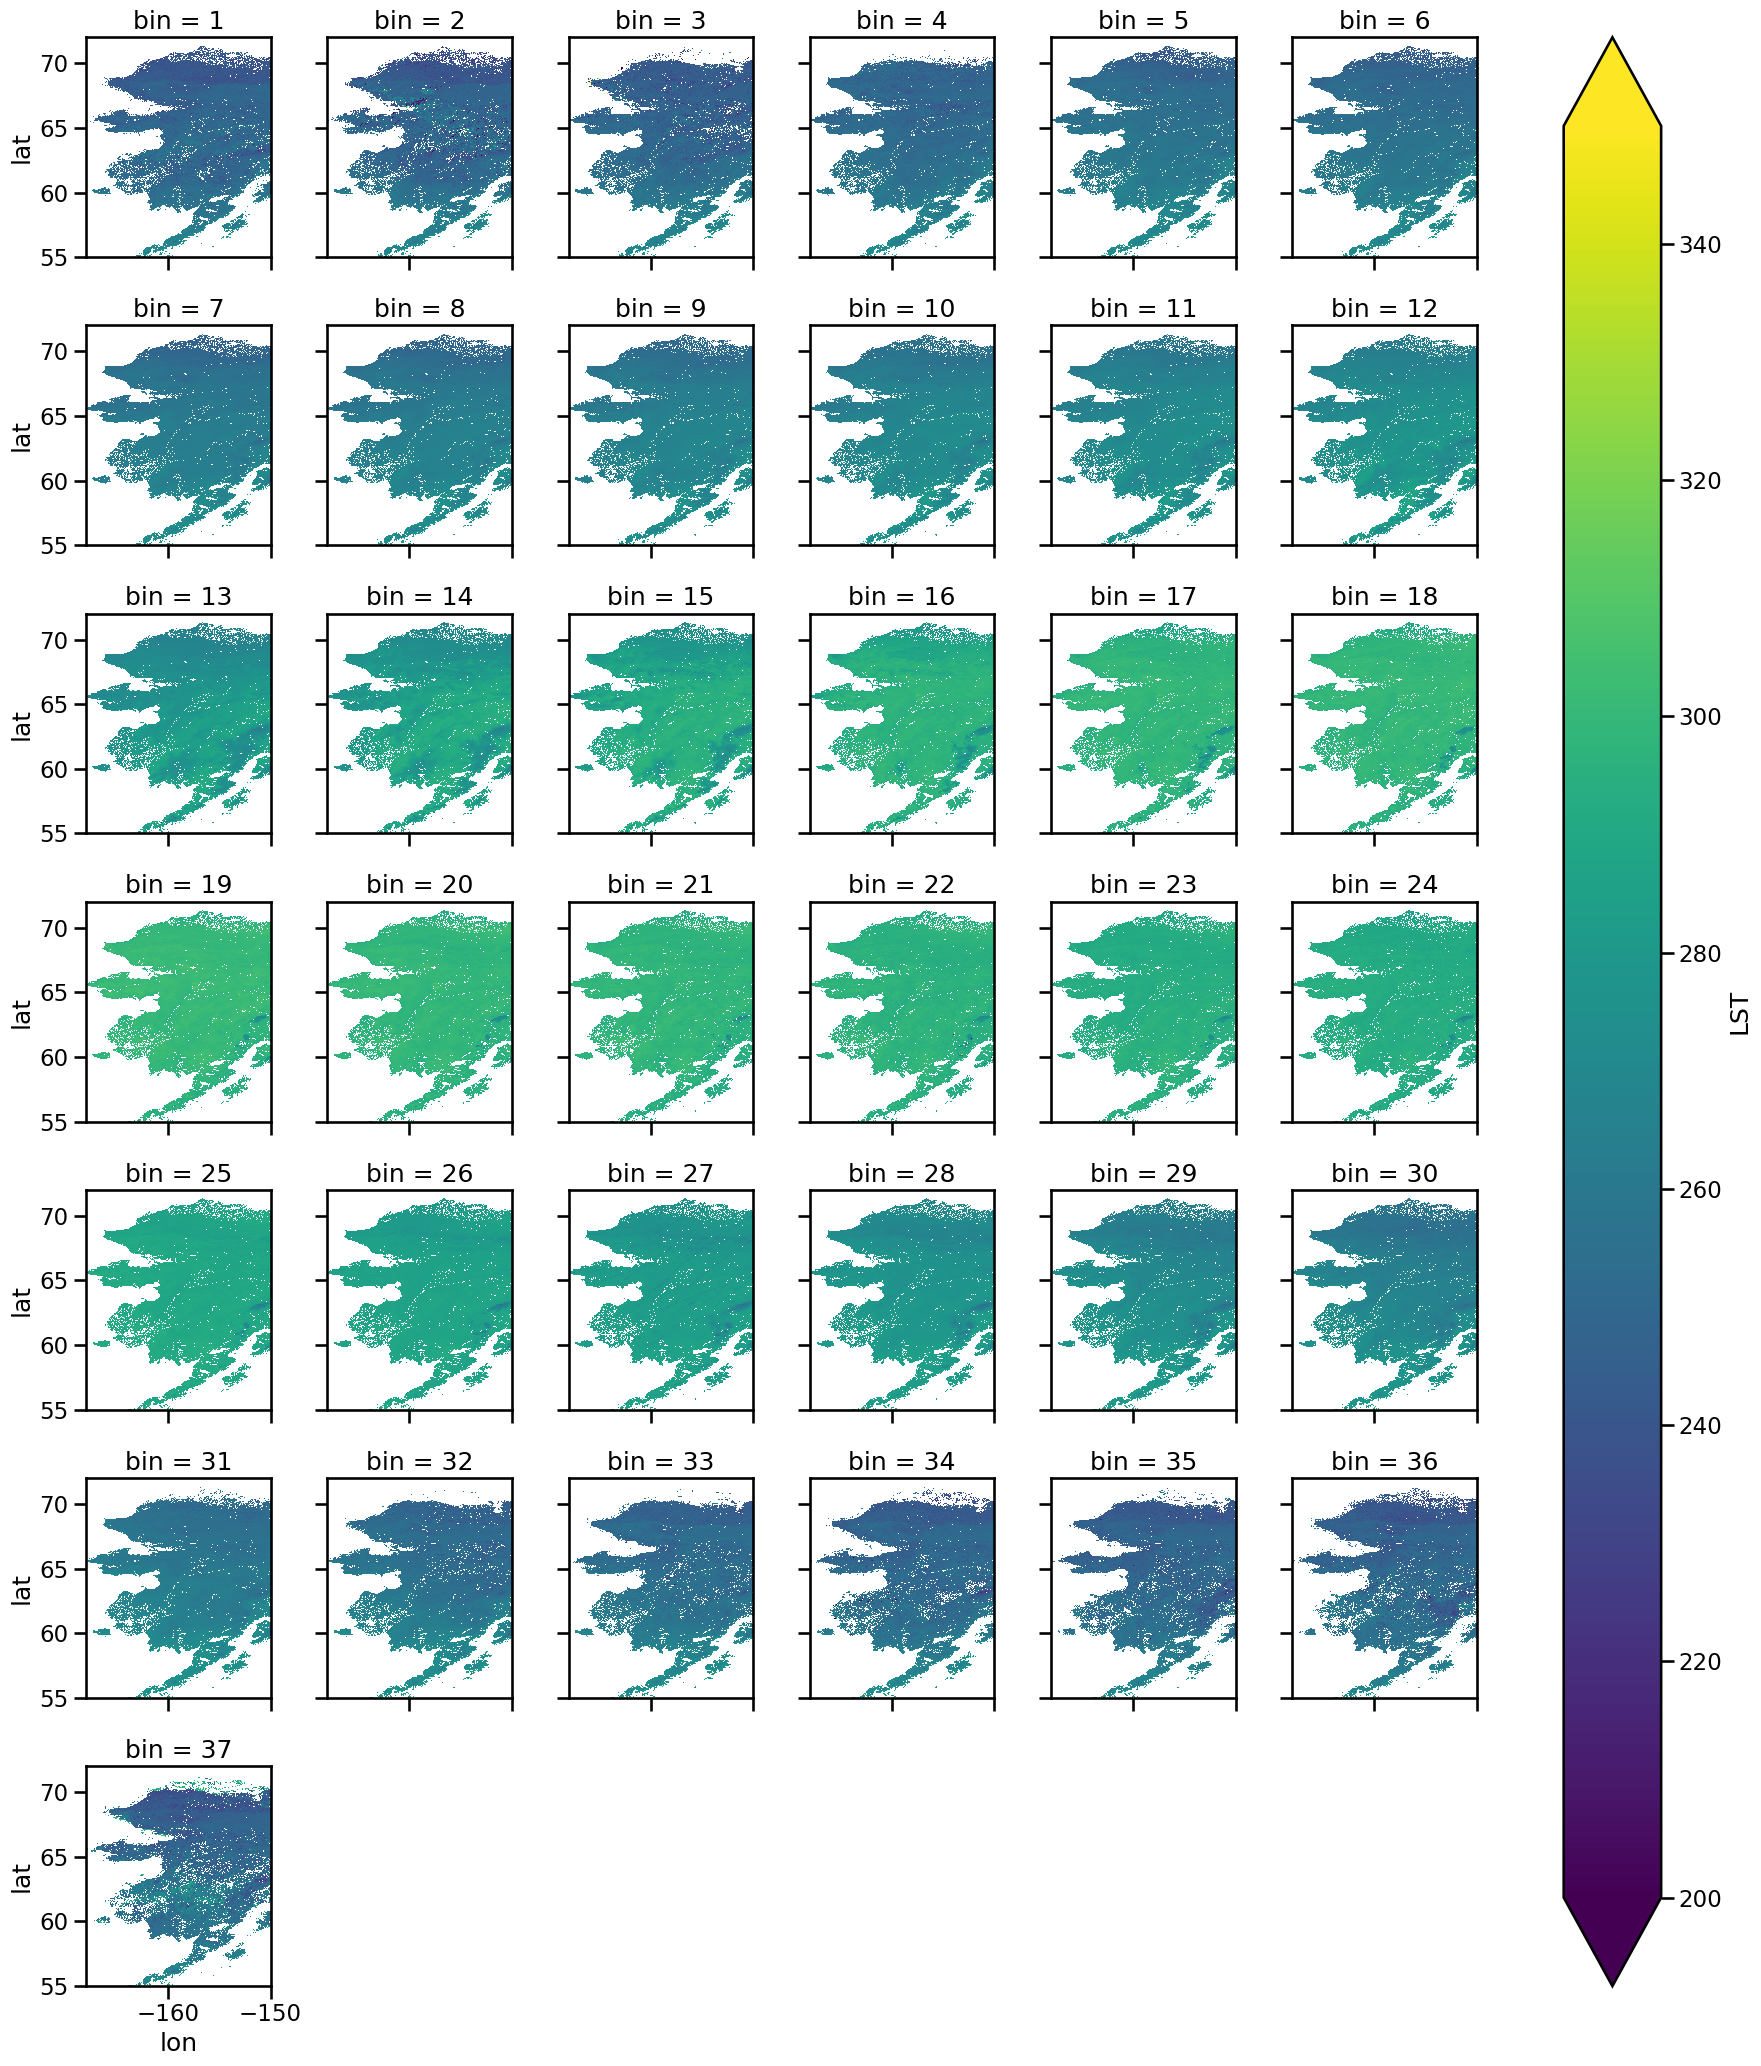

In [349]:
climatology.sel(lat=slice(55,72), lon=slice(-168,-150)).plot(x="lon", y="lat", col="bin", col_wrap=6, vmax=350, vmin=200);

In [350]:
anomalies = combined.groupby("bin") - climatology

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 27 times more chunks
  return self.array[key]


In [351]:
anomalies

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 969)>
dask.array<sub, shape=(800, 7200, 969), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time         (time) datetime64[ns] 1981-07-30 1981-08-09 ... 2007-12-27
    bin          (time) int64 22 23 24 25 26 27 28 29 ... 31 32 33 34 35 36 37

In [352]:
# ! careful, through out empty data bins
# remove water
# Verify All 10 days maxs !

In [279]:
# anomalies plot several times series for different land cover
import seaborn as sns
import matplotlib.pyplot as plt
def plain_subplot(name, ds, anomaly):
    # create subplots
    sns.set_context('talk')

    fig, axs = plt.subplots(2, figsize=(20,10), sharex=True)
    fig.subplots_adjust(hspace=0.05)

    ds.plot(color='darkslategray',marker='.', ax=axs[0])
    axs[0].set_ylabel('LST monthly mean [°K]')
    axs[0].set_title('')

    anomaly.plot(color='darkslategray',ax=axs[1]);
    for ax in axs.flat:
        sns.despine(bottom=False, left=False, ax=ax)
    plt.xlabel('')
    fig.suptitle(name)
    axs[1].set_ylabel('Anomalies [°K]')
    axs[1].set_title('')
    plt.savefig(f'/mnt/data7/nfs4/avh_lst/sdupuis/Paper_3/Plots/{name}_subplots.svg', format='svg', dpi=1200, bbox_inches='tight',pad_inches=0.1)
    #plt.close()

In [280]:
station_name ='alaska_1'
LST_sat = combined.sel(lat=64.9, lon=-162, method='nearest').load()
anomaly_point = anomalies.sel(lat=64.9, lon=-162, method='nearest').load()

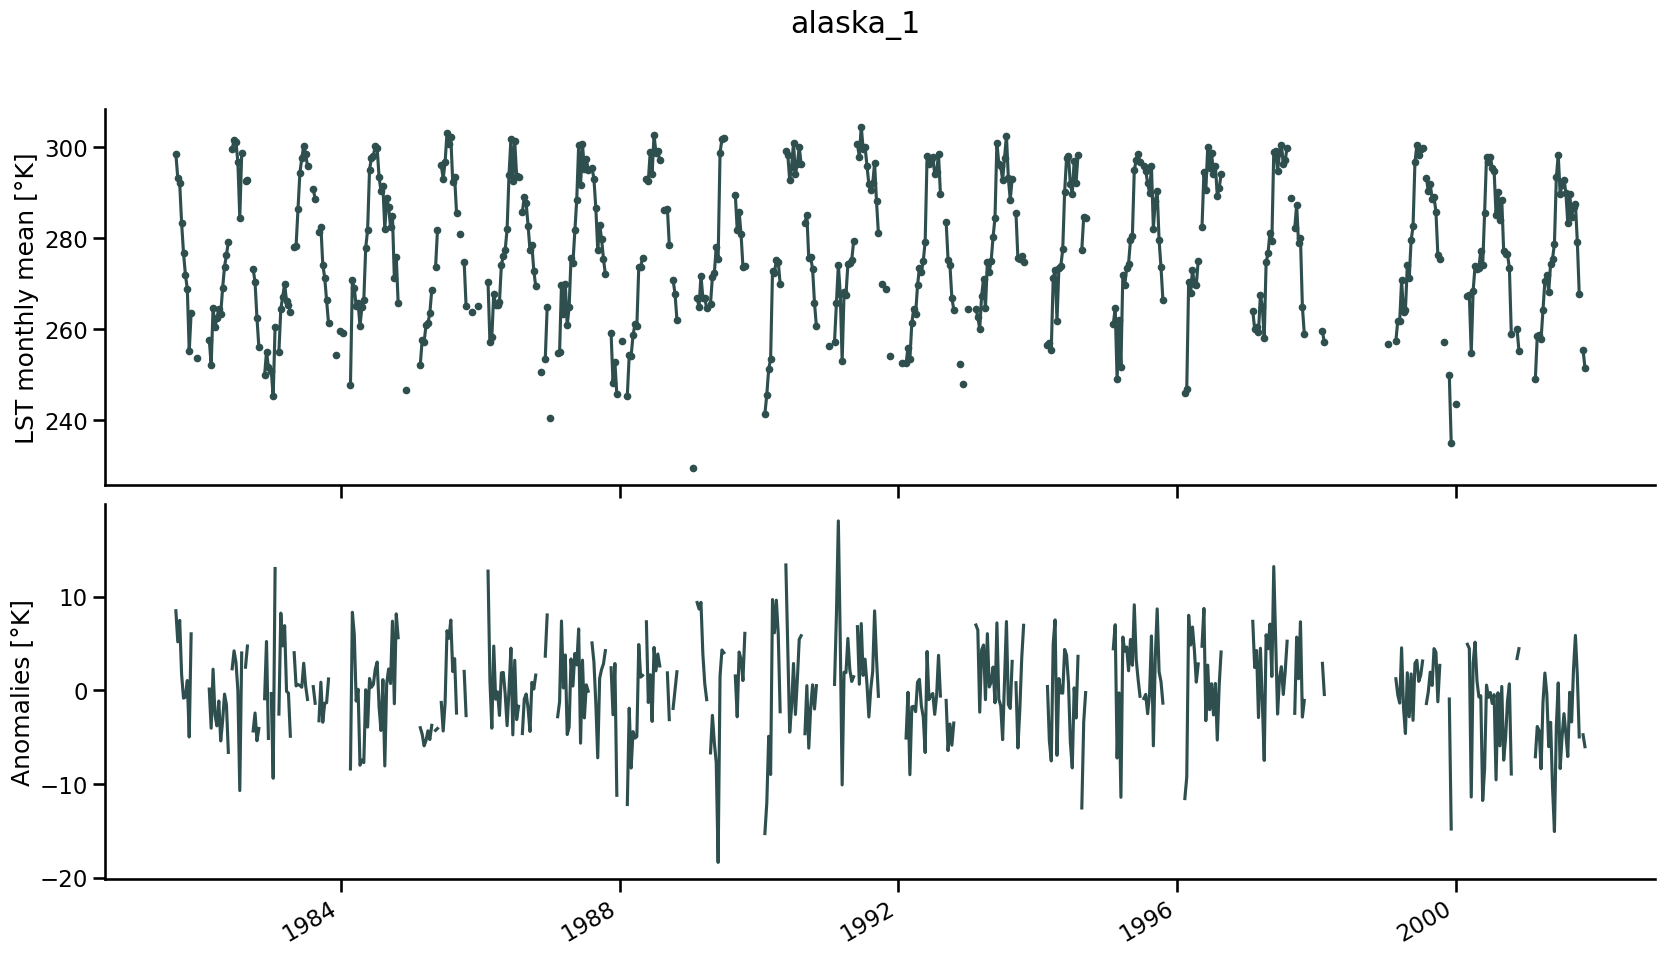

In [281]:
# load before
plain_subplot(station_name, LST_sat, anomaly_point)

In [282]:
anomaly_point

<xarray.DataArray 'LST' (time: 747)>
array([            nan,             nan,  8.48171997e+00,  5.16925049e+00,
        7.45883179e+00,  1.70941162e+00, -8.39324951e-01, -7.25555420e-01,
        1.04067993e+00, -4.98399353e+00,  6.02001953e+00,             nan,
                   nan,  3.79374695e+00,             nan,             nan,
                   nan,             nan,             nan,             nan,
        1.29974365e-01, -4.04109192e+00,  2.24789429e+00, -2.61578369e+00,
       -3.79211426e+00, -1.14105225e+00, -5.40167236e+00, -3.27835083e+00,
       -4.10003662e-01, -1.53524780e+00, -6.62557983e+00,             nan,
        2.29315186e+00,  4.20629883e+00,  2.99053955e+00, -3.89099121e-02,
       -1.06893921e+01,  3.98193359e+00,             nan,  2.46173096e+00,
        4.71926880e+00,             nan,             nan, -4.33932495e+00,
       -2.42556763e+00, -5.37930298e+00, -4.07397461e+00,             nan,
                   nan, -9.00009155e-01,  5.20373535e+00, -5.13751221e+00,
                   nan, -3.52005005e-01, -9.38000488e+00,  1.29866791e+01,
                   nan, -2.54000854e+00,  8.22891235e+00,  4.72787476e+00,
        6.89422607e+00, -1.12121582e-01, -3.01055908e-01, -4.90167236e+00,
                   nan,  4.01000977e+00,  4.64752197e-01,  6.14440918e-01,
        5.15869141e-01,  3.23150635e-01,  2.88632202e+00,  5.00549316e-01,
       -9.78881836e-01,             nan,             nan,  3.94287109e-01,
       -1.38827515e+00,             nan, -3.25115967e+00,  8.59405518e-01,
...
                   nan, -9.30007935e-01, -1.47962646e+01,             nan,
                   nan, -7.51199341e+00,             nan,             nan,
                   nan,             nan,             nan,  4.90789795e+00,
        4.44421387e+00, -1.13821259e+01,  2.90893555e+00,  5.12832642e+00,
        1.02166748e+00, -7.09991455e-01, -5.85266113e-01, -1.17555542e+01,
       -8.35412598e+00,  5.53161621e-01, -7.53692627e-01, -2.39440918e-01,
       -1.40890503e+00, -4.69390869e-01, -9.54806519e+00, -2.65716553e-01,
       -5.92825317e+00,  4.09271240e-01, -7.45117188e+00, -5.10058594e+00,
       -1.15933228e+00,  6.84448242e-01, -8.92932129e+00,             nan,
                   nan,  3.38333130e+00,  4.44000244e+00,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -7.09109497e+00,
       -3.86212158e+00, -4.30578613e+00, -8.37213135e+00, -1.29104614e+00,
        1.83831787e+00, -3.68347168e-01, -6.01000977e+00, -3.41525269e+00,
       -1.03455811e+01, -1.50641174e+01, -3.82684326e+00,  7.86315918e-01,
       -8.34945679e+00, -4.97888184e+00, -2.48937988e+00, -4.65805054e+00,
       -7.06570435e+00, -2.08251953e-01, -3.38073730e+00,  2.27883911e+00,
        5.84939575e+00,  1.58065796e+00, -4.97555542e+00,             nan,
       -4.74398804e+00, -6.01998901e+00,             nan,             nan,
                   nan,             nan,             nan], dtype=float32)
Coordinates:
    lat          float32 64.93
    lon          float32 -162.0
    band         (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time         (time) datetime64[ns] 1981-07-30 1981-08-09 ... 2001-12-27
    bin          (time) int64 22 23 24 25 26 27 28 29 ... 31 32 33 34 35 36 37

In [283]:
# Mann Kendall Slope
anomalies_filtered = anomaly_point.dropna(dim='time') # filter ??? 

# slopes
res = mk.original_test(anomaly_point.values)
LST_slope = res.slope*10*37
print(f'LST: {res.trend}')

LST: no trend


In [284]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# compute slopes
compute_len = len(anomaly_point)
lin = np.linspace(1,compute_len, compute_len)
y = res.slope*lin + res.intercept

slope_da = anomaly_point.copy(data=y)

# LOWESS fit
lowess_sat = lowess(anomaly_point.values, anomaly_point.time, frac=1/20, it=0, is_sorted=True)
result_lowess_sat = lowess_sat[:,1]
trends_da = anomalies_filtered.copy(data=result_lowess_sat)

In [285]:
anomaly_point

<xarray.DataArray 'LST' (time: 747)>
array([            nan,             nan,  8.48171997e+00,  5.16925049e+00,
        7.45883179e+00,  1.70941162e+00, -8.39324951e-01, -7.25555420e-01,
        1.04067993e+00, -4.98399353e+00,  6.02001953e+00,             nan,
                   nan,  3.79374695e+00,             nan,             nan,
                   nan,             nan,             nan,             nan,
        1.29974365e-01, -4.04109192e+00,  2.24789429e+00, -2.61578369e+00,
       -3.79211426e+00, -1.14105225e+00, -5.40167236e+00, -3.27835083e+00,
       -4.10003662e-01, -1.53524780e+00, -6.62557983e+00,             nan,
        2.29315186e+00,  4.20629883e+00,  2.99053955e+00, -3.89099121e-02,
       -1.06893921e+01,  3.98193359e+00,             nan,  2.46173096e+00,
        4.71926880e+00,             nan,             nan, -4.33932495e+00,
       -2.42556763e+00, -5.37930298e+00, -4.07397461e+00,             nan,
                   nan, -9.00009155e-01,  5.20373535e+00, -5.13751221e+00,
                   nan, -3.52005005e-01, -9.38000488e+00,  1.29866791e+01,
                   nan, -2.54000854e+00,  8.22891235e+00,  4.72787476e+00,
        6.89422607e+00, -1.12121582e-01, -3.01055908e-01, -4.90167236e+00,
                   nan,  4.01000977e+00,  4.64752197e-01,  6.14440918e-01,
        5.15869141e-01,  3.23150635e-01,  2.88632202e+00,  5.00549316e-01,
       -9.78881836e-01,             nan,             nan,  3.94287109e-01,
       -1.38827515e+00,             nan, -3.25115967e+00,  8.59405518e-01,
...
                   nan, -9.30007935e-01, -1.47962646e+01,             nan,
                   nan, -7.51199341e+00,             nan,             nan,
                   nan,             nan,             nan,  4.90789795e+00,
        4.44421387e+00, -1.13821259e+01,  2.90893555e+00,  5.12832642e+00,
        1.02166748e+00, -7.09991455e-01, -5.85266113e-01, -1.17555542e+01,
       -8.35412598e+00,  5.53161621e-01, -7.53692627e-01, -2.39440918e-01,
       -1.40890503e+00, -4.69390869e-01, -9.54806519e+00, -2.65716553e-01,
       -5.92825317e+00,  4.09271240e-01, -7.45117188e+00, -5.10058594e+00,
       -1.15933228e+00,  6.84448242e-01, -8.92932129e+00,             nan,
                   nan,  3.38333130e+00,  4.44000244e+00,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -7.09109497e+00,
       -3.86212158e+00, -4.30578613e+00, -8.37213135e+00, -1.29104614e+00,
        1.83831787e+00, -3.68347168e-01, -6.01000977e+00, -3.41525269e+00,
       -1.03455811e+01, -1.50641174e+01, -3.82684326e+00,  7.86315918e-01,
       -8.34945679e+00, -4.97888184e+00, -2.48937988e+00, -4.65805054e+00,
       -7.06570435e+00, -2.08251953e-01, -3.38073730e+00,  2.27883911e+00,
        5.84939575e+00,  1.58065796e+00, -4.97555542e+00,             nan,
       -4.74398804e+00, -6.01998901e+00,             nan,             nan,
                   nan,             nan,             nan], dtype=float32)
Coordinates:
    lat          float32 64.93
    lon          float32 -162.0
    band         (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time         (time) datetime64[ns] 1981-07-30 1981-08-09 ... 2001-12-27
    bin          (time) int64 22 23 24 25 26 27 28 29 ... 31 32 33 34 35 36 37

Text(0.5, 1.0, 'alaska_1')

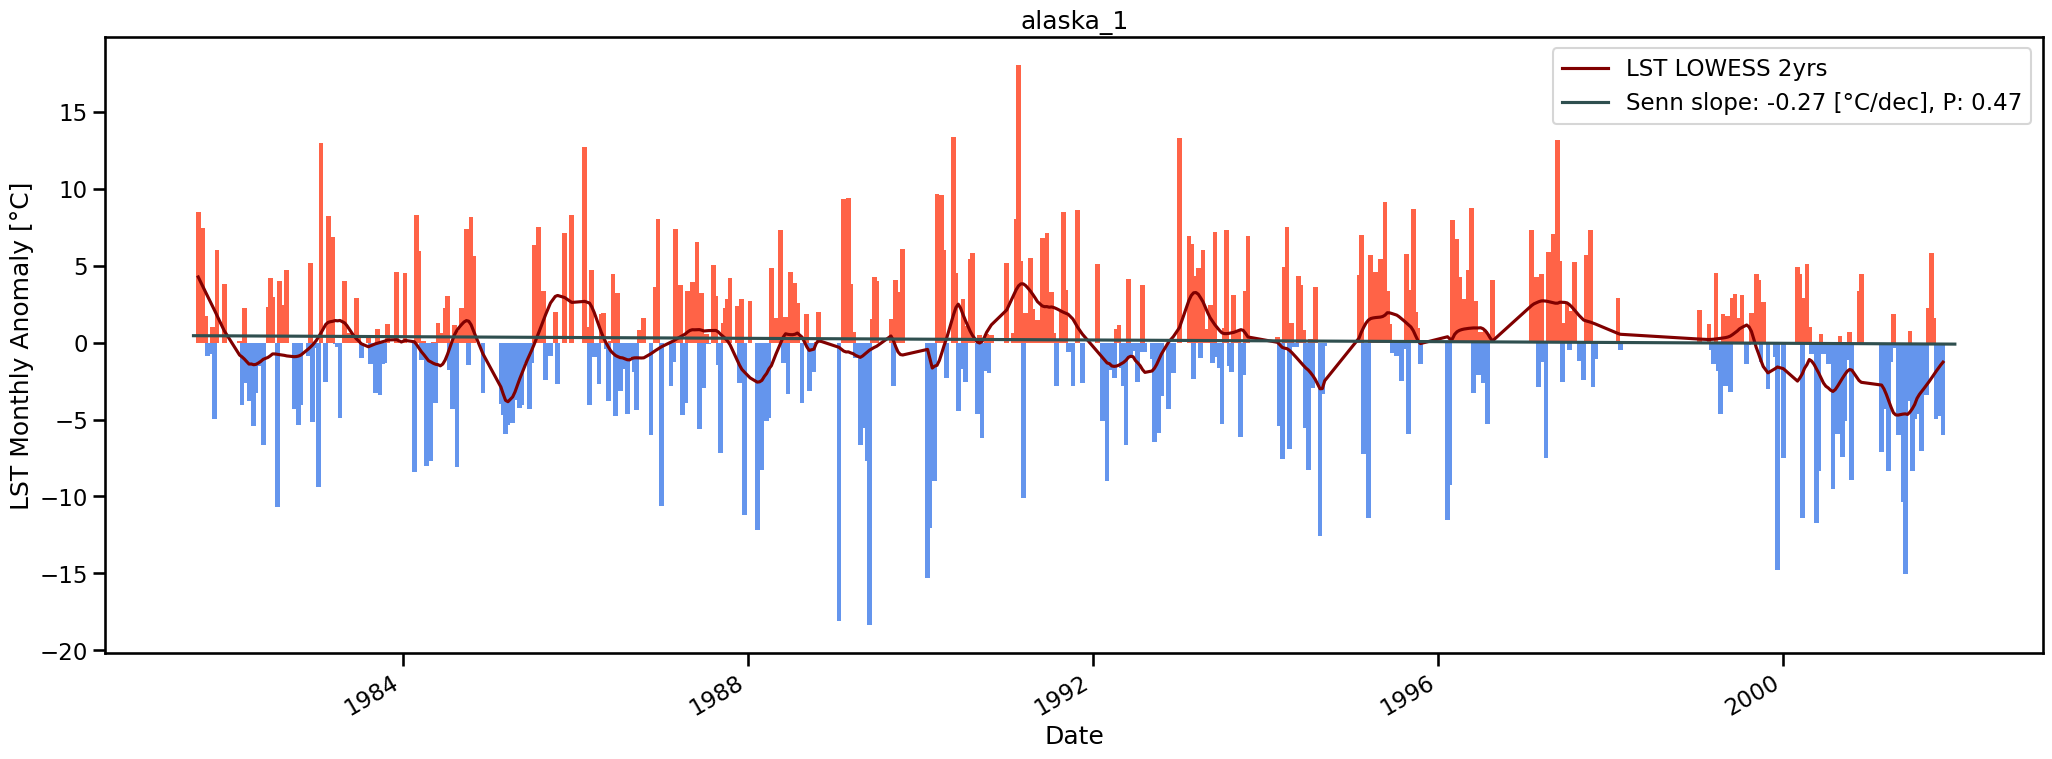

In [288]:
# Bar plot

LST_anomalies = anomaly_point.to_dataframe()

# setting figure size to 12, 10
fig, axs = plt.subplots(1,figsize=(25, 8))
 
 
plt.bar(LST_anomalies.index[LST_anomalies['LST'] < 0], LST_anomalies['LST'][LST_anomalies['LST'] < 0], color='cornflowerblue', width=20)
plt.bar(LST_anomalies.index[LST_anomalies['LST'] > 0], LST_anomalies['LST'][LST_anomalies['LST'] > 0], color='tomato', width=20)
#plt.bar(LST_anomalies.index, LST_anomalies['LST'], width=20);
trends_da.plot(label='LST LOWESS 2yrs', color='maroon')
slope_da.plot(label=f'Senn slope: {LST_slope:.2f} [°C/dec], P: {res.p:.2f}', color='darkslategray')
#axs.set_xlim([datetime.date(1984,1,1), datetime.date(2021,2,15)]);
plt.legend()
plt.xlabel("Date")
plt.ylabel("LST Monthly Anomaly [°C]")
plt.title(station_name)
#plt.savefig(f'/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/00_Plots_10112023/{station_name}__anomalies_bar.svg', format='svg', dpi=1200, bbox_inches='tight',pad_inches=0.1)


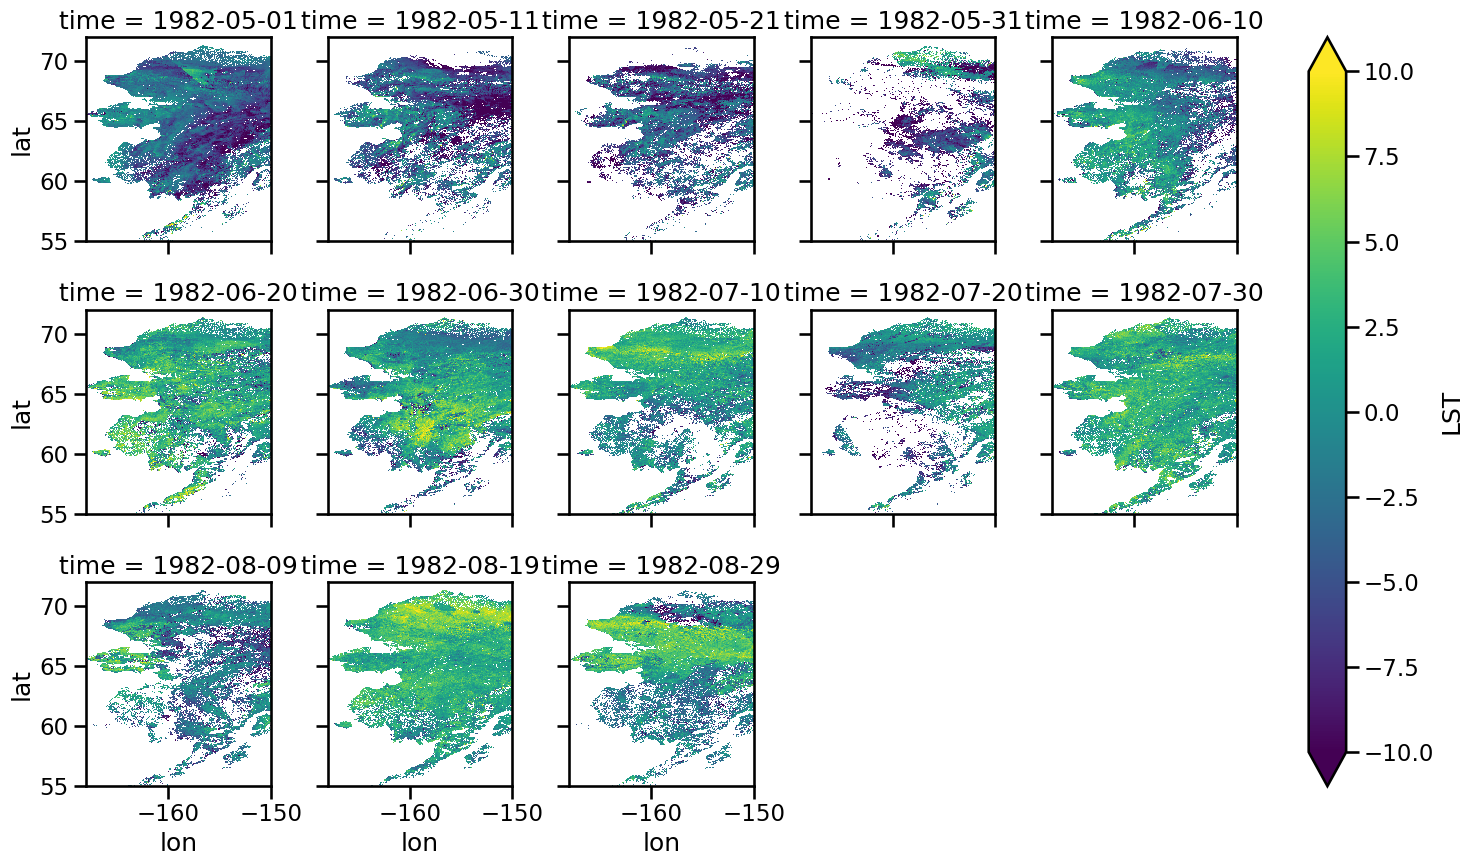

In [289]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150), time=slice('1982-05','1982-08')).plot(x="lon", y="lat", col="time", col_wrap=5, vmin=-10, vmax=10);
plt.savefig('anomalies.png')

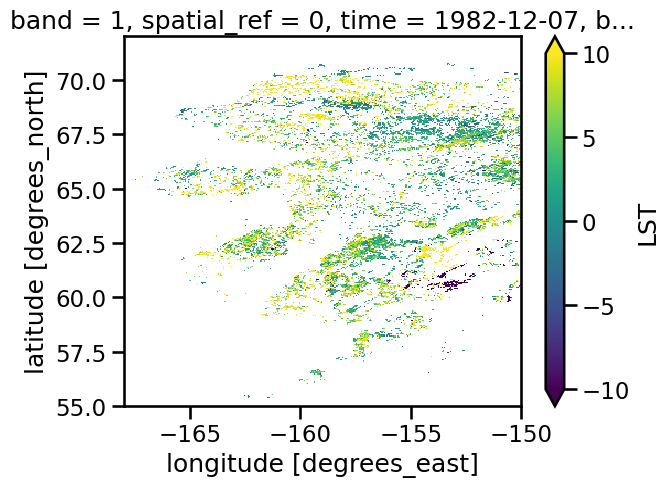

In [353]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(time=50).plot(vmax=10, vmin=-10);

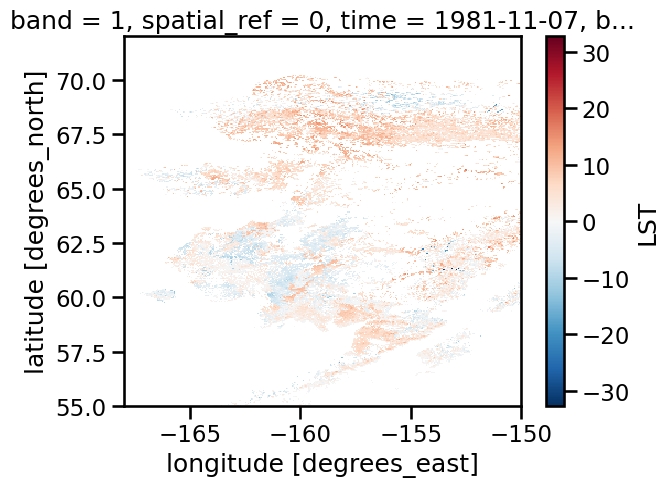

In [354]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(time=10).plot();

In [355]:
anoms = anomalies.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms = anoms.chunk(dict(time=-1))   # <<< REQUIRED

In [356]:
time_numeric = (
    anoms.time.dt.year +
    (anoms.time.dt.dayofyear - 1) / 365.0
)


In [357]:
time_numeric.values

array([1981.57534247, 1981.60273973, 1981.63013699, 1981.65753425,
       1981.68493151, 1981.71232877, 1981.73972603, 1981.76712329,
       1981.79452055, 1981.82191781, 1981.84931507, 1981.87671233,
       1981.90410959, 1981.93150685, 1981.95890411, 1981.98630137,
       1982.        , 1982.02739726, 1982.05479452, 1982.08219178,
       1982.10958904, 1982.1369863 , 1982.16438356, 1982.19178082,
       1982.21917808, 1982.24657534, 1982.2739726 , 1982.30136986,
       1982.32876712, 1982.35616438, 1982.38356164, 1982.4109589 ,
       1982.43835616, 1982.46575342, 1982.49315068, 1982.52054795,
       1982.54794521, 1982.57534247, 1982.60273973, 1982.63013699,
       1982.65753425, 1982.68493151, 1982.71232877, 1982.73972603,
       1982.76712329, 1982.79452055, 1982.82191781, 1982.84931507,
       1982.87671233, 1982.90410959, 1982.93150685, 1982.95890411,
       1982.98630137, 1983.        , 1983.02739726, 1983.05479452,
       1983.08219178, 1983.10958904, 1983.1369863 , 1983.16438

In [295]:
anoms.sel(lat=69, lon=-157, method='nearest').values

array([         nan,          nan,  -8.966644  ,  -2.2905884 ,
         1.4989014 ,          nan,  -8.042725  ,  -0.4550171 ,
         4.7274933 ,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,   0.8600006 ,          nan,
       -12.353851  ,   7.3539886 ,   9.388321  ,   2.0005646 ,
        -5.2110596 ,  13.839478  ,  -6.5436707 ,  -1.3463135 ,
         1.410553  ,  -3.357666  ,  -4.154724  ,          nan,
        -3.0689392 ,   2.968872  ,  -1.0666809 ,   0.59155273,
        -2.2060852 ,   0.8199768 ,  -4.0753174 ,   7.4833374 ,
        -3.7905884 ,  -7.4711    ,  -3.0824585 ,          nan,
                nan,  11.517487  ,   0.0920105 ,          nan,
                nan,          nan,  13.770004  ,  -3.949997  ,
                nan,  -1.0249939 ,          nan,          nan,
                nan, -10.233856  , -13.886017  ,  -3.5516815 ,
        -6.4194336 ,   0.60894775,  -5.0505066 ,  -1.87

In [66]:
from scipy.stats import theilslopes
import xarray as xr

def theil_sen_slope(y, x):
    slope, _, _, _ = theilslopes(y, x)
    return slope

In [67]:
theil_sen_trend = xr.apply_ufunc(
    theil_sen_slope,
    anoms,
    time_numeric,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

# Convert from per-year to per-decade
trend_per_decade = theil_sen_trend * 10

In [358]:
import numpy as np
from scipy.stats import theilslopes

def theil_sen_1d(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return slope


In [297]:
import numpy as np
from scipy.stats import theilslopes

def theil_sen_1d_inter(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return intercept

In [298]:
intercept = xr.apply_ufunc(
    theil_sen_1d_inter,
    anoms,
    time_numeric,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)


In [359]:
slope = xr.apply_ufunc(
    theil_sen_1d,
    anoms,
    time_numeric,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade = slope * 1

In [360]:
slope

<xarray.DataArray (lat: 340, lon: 360)>
dask.array<transpose, shape=(340, 360), dtype=float64, chunksize=(340, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.03 55.08 55.12 55.17 ... 71.82 71.88 71.93 71.97
  * lon      (lon) float32 -168.0 -167.9 -167.9 -167.8 ... -150.1 -150.1 -150.0

In [361]:
from dask.diagnostics import ProgressBar

In [362]:
with ProgressBar():
    res = trend_per_decade.compute()

[########################################] | 100% Completed | 39m 0ss


In [ ]:
# that won't work because of nans
# do trends on lowess ? 

In [304]:
res.to_netcdf('annual_lst_trends_alaska.nc')

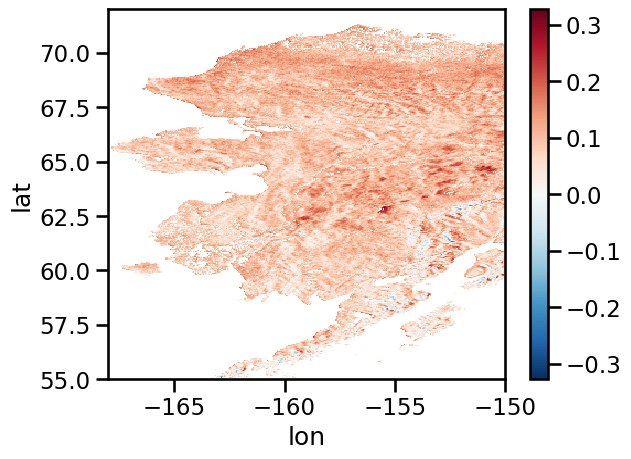

In [ ]:
res.plot();
# seems too much!
# comiso and hall same magnitude for Alaska

In [ ]:
# spacing of the 10D max bins ? space it like 3 per month ? -> use monthly max ? maybe use bi-monthly
# robustness of trends ? -> maybe 5 points! 
# validtidy of mean for the climatology ? clear-sky biais trend there ?
# clear sky bias ? -> compute number of valid points !
# annual max temp ? - satellites are drifting? -> verify time series, compare with modis! what are the overpass times ? afternoon sats are the warm temperatures !
# compare to MODIS data ? -> maybe few points ?
# mask out with significance ?
# compare with CARRA 

In [305]:
import pymannkendall as mk

def mk_pvalue(y):
    y = y[np.isfinite(y)]
    if y.size < 5:
        return np.nan
    return mk.original_test(y).p

In [97]:
def mk_pvalue_slope(y):
    y = y[np.isfinite(y)]
    if y.size < 5:
        return np.nan
    return mk.original_test(y).slope

In [98]:
res_2 = xr.apply_ufunc(
    mk_pvalue_slope,
    anoms,
    input_core_dims=[["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [364]:
mk_p = xr.apply_ufunc(
    mk_pvalue,
    anoms,
    input_core_dims=[["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [99]:
with ProgressBar():
    trends = res_2.compute()

[########################################] | 100% Completed | 14m 6ss


In [365]:
with ProgressBar():
    p_val = mk_p.compute()

[########################################] | 100% Completed | 43m 8ss


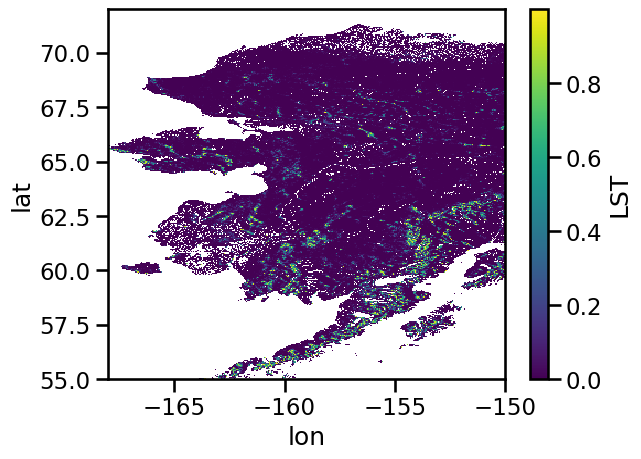

In [366]:
p_val.plot();

In [105]:
yearly_trends = trends * 37 *10

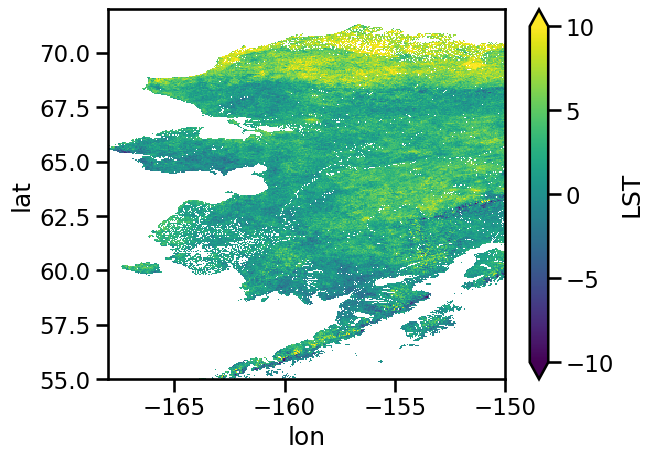

In [107]:
yearly_trends.plot(vmax=10, vmin=-10);

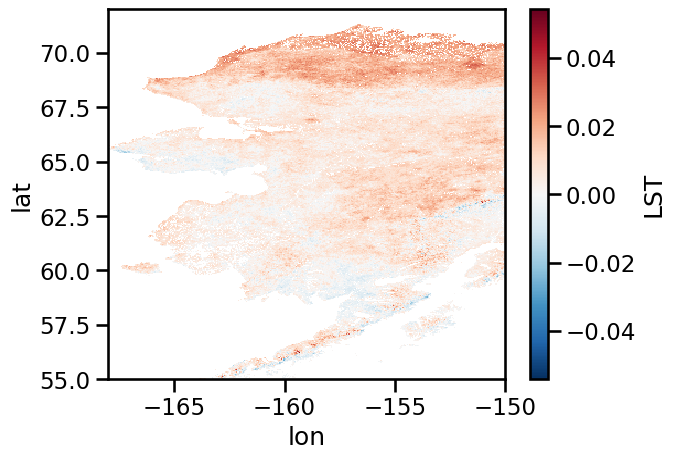

In [101]:
trends.plot();

In [102]:
anoms

<xarray.DataArray 'LST' (lat: 340, lon: 360, time: 346)>
dask.array<rechunk-merge, shape=(340, 360, 346), dtype=float32, chunksize=(340, 360, 346), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 55.03 55.08 55.12 55.17 ... 71.88 71.93 71.97
  * lon          (lon) float32 -168.0 -167.9 -167.9 ... -150.1 -150.1 -150.0
    band         (time) int64 dask.array<chunksize=(346,), meta=np.ndarray>
    spatial_ref  (time) int64 dask.array<chunksize=(346,), meta=np.ndarray>
  * time         (time) datetime64[ns] 1981-07-30 1981-08-09 ... 1990-12-27
    bin          (time) int64 dask.array<chunksize=(346,), meta=np.ndarray>

In [313]:
significant_trend = res.where(p_val < 0.1)


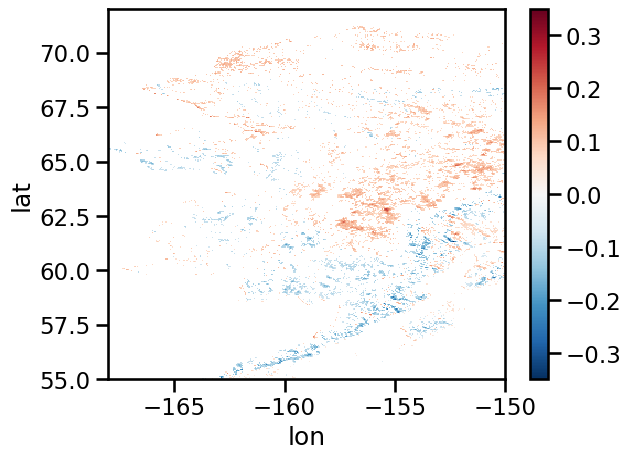

In [315]:
significant_trend.plot();

In [ ]:
# verify those trends with CARRA ? or era5 land ? -> keeping only clear sky days! -> Apply the GAC cloud mask ! rather era5 land, because i already have the data

In [316]:
significant_trend.to_netcdf('significant_trends.nc')

In [55]:
year_numeric = anoms.time.dt.year
year_grouped = year_numeric.groupby(anoms.bin)
anom_grouped  = anoms.groupby("bin")


In [56]:
from scipy.stats import theilslopes

def theil_sen_1d(y, x):
    slope, intercept, lower, upper = theilslopes(y, x)
    return slope

In [57]:
theil_sen_trend = xr.apply_ufunc(
    theil_sen_1d,
    anom_grouped,
    year_grouped,
    input_core_dims=[["time"], ["time"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)


In [58]:
trend_per_decade = theil_sen_trend * 10


In [59]:
trend_per_decade

<xarray.DataArray (lat: 340, lon: 360, bin: 37)>
dask.array<mul, shape=(340, 360, 37), dtype=float64, chunksize=(340, 360, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.03 55.08 55.12 55.17 ... 71.82 71.88 71.93 71.97
  * lon      (lon) float32 -168.0 -167.9 -167.9 -167.8 ... -150.1 -150.1 -150.0
  * bin      (bin) int64 1 2 3 4 5 6 7 8 9 10 ... 28 29 30 31 32 33 34 35 36 37

In [60]:
theil_sen_trend

<xarray.DataArray (lat: 340, lon: 360, bin: 37)>
dask.array<transpose, shape=(340, 360, 37), dtype=float64, chunksize=(340, 360, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.03 55.08 55.12 55.17 ... 71.82 71.88 71.93 71.97
  * lon      (lon) float32 -168.0 -167.9 -167.9 -167.8 ... -150.1 -150.1 -150.0
  * bin      (bin) int64 1 2 3 4 5 6 7 8 9 10 ... 28 29 30 31 32 33 34 35 36 37

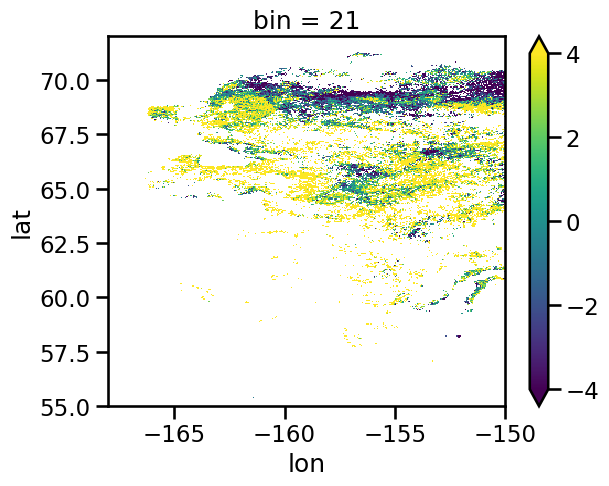

In [61]:
trend_per_decade.isel(bin=20).plot(vmin=-4, vmax=4);

In [ ]:
# trends over all bins ?? compute anomalies over all bins !
# investigate the landcover !
# add more years!
# speed it up

In [ ]:
# start with Max Annual LST ! and then compute trends !


In [ ]:
# only pick summer and winter and verify with CLARA radiation ! 